<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week10/2022_2_ImgProc_MO4_CH7_Thresholding_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/2022_영상정보처리/Notebook-Week\ 10
from google.colab.patches import cv2_imshow
import matplotlib.cm as cm
import numpy as np

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/2022_영상정보처리/Notebook-Week 10


In [ ]:
# cd to your working directory 
%ls ..

 2022-1-Midterm-SampleImages/  'Notebook-Week 2'/  'Notebook-Week 6'/
 Dongkeun-OpenCV-ImgData/      'Notebook-Week 3'/  'Notebook-Week 7'/
 Midterm/                      'Notebook-Week 4'/  'Notebook-Week 9'/
'Notebook-Week 10'/            'Notebook-Week 5'/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib_jh(img, title):
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

# matplot grayscale display
def show_with_matplotlib_gray_jh(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)

    if not axis_show:
      plt.axis('off')

    plt.show()

### Chapter 7: Thresholding Techniques

Source Code: thresholding_introduction.py

In [ ]:
def build_sample_image():
    """Builds a sample image with 50x50 regions of different tones of gray"""

    # Define the different tones.
    # The end of interval is not included
    tones = np.arange(start=50, stop=300, step=50)
    # print(tones)

    # Initialize result with the first 50x50 region with 0-intensity level
    result = np.zeros((50, 50, 3), dtype="uint8")

    # Build the image concatenating horizontally the regions:
    for tone in tones:
        img = np.ones((50, 50, 3), dtype="uint8") * tone
        result = np.concatenate((result, img), axis=1)

    return result


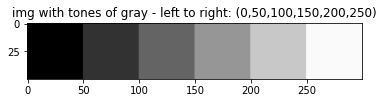

In [ ]:
# Load the image and convert it to grayscale:
image = build_sample_image()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the grayscale images and the histograms:
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR),
                         "img with tones of gray - left to right: (0,50,100,150,200,250)")

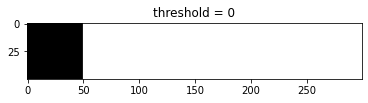

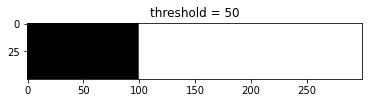

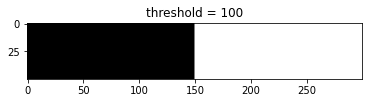

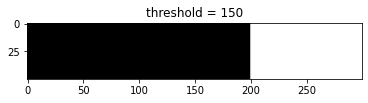

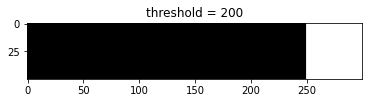

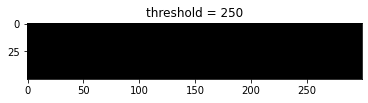

In [ ]:
# Apply cv2.threshold() with different thresholding values:
ret1, thresh1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
ret4, thresh4 = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
ret5, thresh5 = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
ret6, thresh6 = cv2.threshold(gray_image, 250, 255, cv2.THRESH_BINARY)

# Plot the images:
show_with_matplotlib_jh(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR), "threshold = 0")
show_with_matplotlib_jh(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR), "threshold = 50")
show_with_matplotlib_jh(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2BGR), "threshold = 100")
show_with_matplotlib_jh(cv2.cvtColor(thresh4, cv2.COLOR_GRAY2BGR), "threshold = 150")
show_with_matplotlib_jh(cv2.cvtColor(thresh5, cv2.COLOR_GRAY2BGR), "threshold = 200")
show_with_matplotlib_jh(cv2.cvtColor(thresh6, cv2.COLOR_GRAY2BGR), "threshold = 250")

# source code: thresholding_simple_types.py

*   List item
*   List item



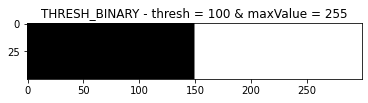

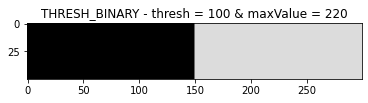

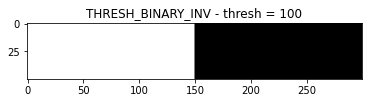

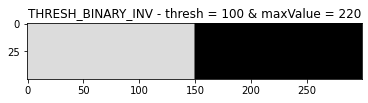

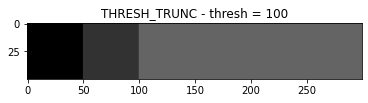

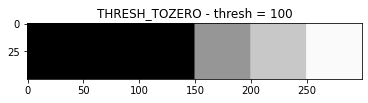

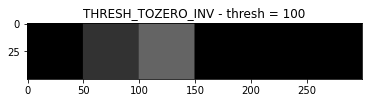

In [ ]:
# Apply cv2.threshold() with different thresholding values:
ret1, thresh1 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(gray_image, 100, 220, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
ret4, thresh4 = cv2.threshold(gray_image, 100, 220, cv2.THRESH_BINARY_INV)
ret5, thresh5 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_TRUNC)
ret6, thresh6 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_TOZERO)
ret7, thresh7 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_TOZERO_INV)

# Plot the images:
show_with_matplotlib_jh(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR), "THRESH_BINARY - thresh = 100 & maxValue = 255")
show_with_matplotlib_jh(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR), "THRESH_BINARY - thresh = 100 & maxValue = 220")
show_with_matplotlib_jh(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2BGR), "THRESH_BINARY_INV - thresh = 100")
show_with_matplotlib_jh(cv2.cvtColor(thresh4, cv2.COLOR_GRAY2BGR), "THRESH_BINARY_INV - thresh = 100 & maxValue = 220")
show_with_matplotlib_jh(cv2.cvtColor(thresh5, cv2.COLOR_GRAY2BGR), "THRESH_TRUNC - thresh = 100")
show_with_matplotlib_jh(cv2.cvtColor(thresh6, cv2.COLOR_GRAY2BGR), "THRESH_TOZERO - thresh = 100")
show_with_matplotlib_jh(cv2.cvtColor(thresh7, cv2.COLOR_GRAY2BGR), "THRESH_TOZERO_INV - thresh = 100")

# source code: thresholding_example.py

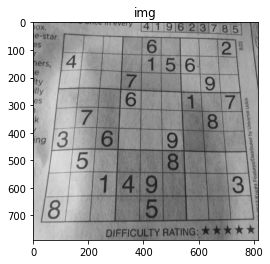

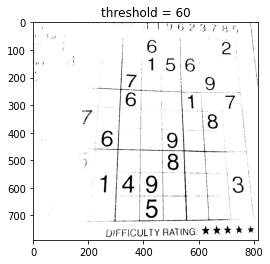

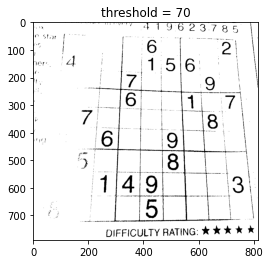

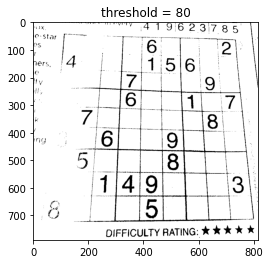

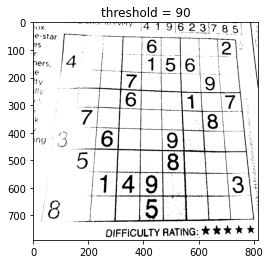

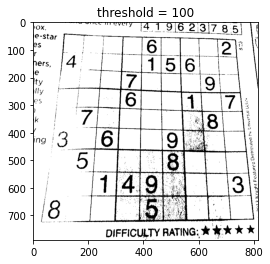

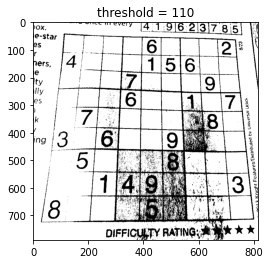

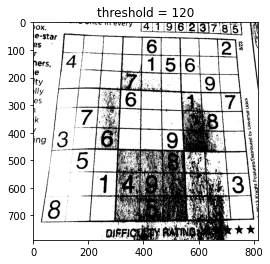

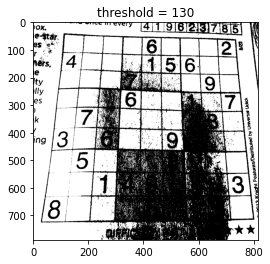

In [ ]:
# Load the image and convert it to grayscale:
image_path = '../Dongkeun-OpenCV-ImgData/sudoku.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the grayscale image:
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "img")

# Apply cv2.threshold() with different thresholding values:
ret1, thresh1 = cv2.threshold(gray_image, 60, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)
ret4, thresh4 = cv2.threshold(gray_image, 90, 255, cv2.THRESH_BINARY)
ret5, thresh5 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
ret6, thresh6 = cv2.threshold(gray_image, 110, 255, cv2.THRESH_BINARY)
ret7, thresh7 = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)
ret8, thresh8 = cv2.threshold(gray_image, 130, 255, cv2.THRESH_BINARY)

# Plot all the thresholded images:
show_with_matplotlib_jh(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR), "threshold = 60")
show_with_matplotlib_jh(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR), "threshold = 70")
show_with_matplotlib_jh(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2BGR), "threshold = 80")
show_with_matplotlib_jh(cv2.cvtColor(thresh4, cv2.COLOR_GRAY2BGR), "threshold = 90")
show_with_matplotlib_jh(cv2.cvtColor(thresh5, cv2.COLOR_GRAY2BGR), "threshold = 100")
show_with_matplotlib_jh(cv2.cvtColor(thresh6, cv2.COLOR_GRAY2BGR), "threshold = 110")
show_with_matplotlib_jh(cv2.cvtColor(thresh7, cv2.COLOR_GRAY2BGR), "threshold = 120")
show_with_matplotlib_jh(cv2.cvtColor(thresh8, cv2.COLOR_GRAY2BGR), "threshold = 130")


# source code: thresholding_addaptive.py

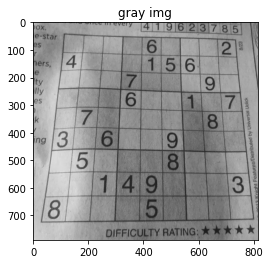

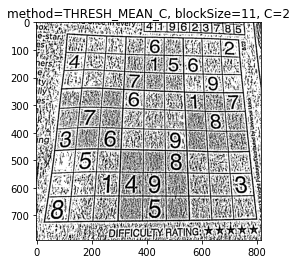

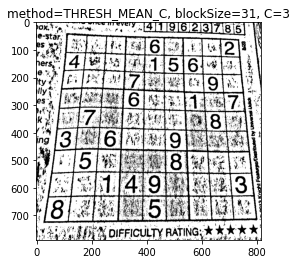

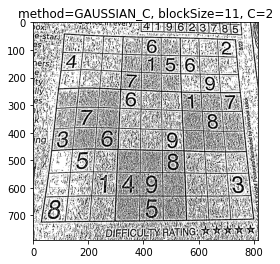

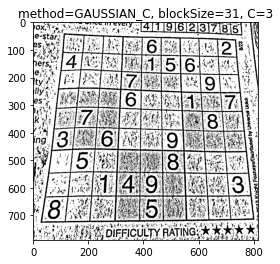

In [ ]:
# Perform adaptive thresholding with different parameters:
thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 3)

# Plot the thresholded images:
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray img")
show_with_matplotlib_jh(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR), "method=THRESH_MEAN_C, blockSize=11, C=2")
show_with_matplotlib_jh(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR), "method=THRESH_MEAN_C, blockSize=31, C=3")
show_with_matplotlib_jh(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2BGR), "method=GAUSSIAN_C, blockSize=11, C=2")
show_with_matplotlib_jh(cv2.cvtColor(thresh4, cv2.COLOR_GRAY2BGR), "method=GAUSSIAN_C, blockSize=31, C=3")

# source code: thresholding_adaptive_filter_noise.py

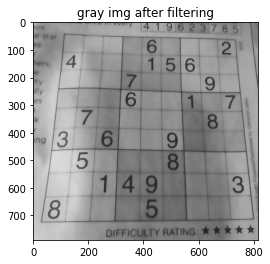

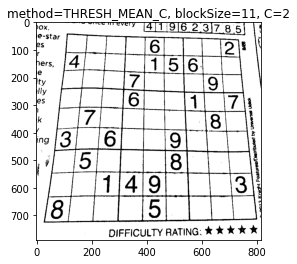

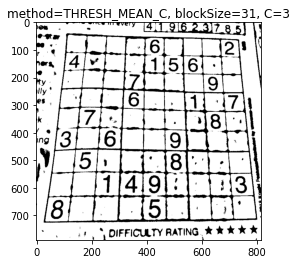

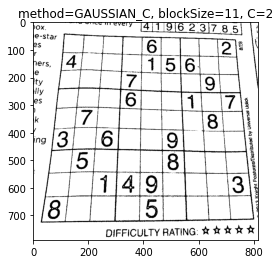

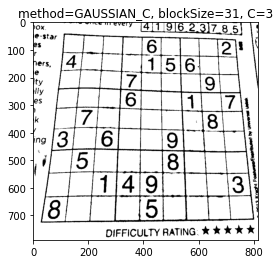

In [ ]:
# Apply a bilateral filter in order to reduce noise while keeping the edges sharp:
gray_image = cv2.bilateralFilter(gray_image, 15, 25, 25)

# Perform adaptive thresholding with different parameters:
thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 3)

# Plot the thresholded images:
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray img after filtering")
show_with_matplotlib_jh(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR), "method=THRESH_MEAN_C, blockSize=11, C=2")
show_with_matplotlib_jh(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR), "method=THRESH_MEAN_C, blockSize=31, C=3")
show_with_matplotlib_jh(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2BGR), "method=GAUSSIAN_C, blockSize=11, C=2")
show_with_matplotlib_jh(cv2.cvtColor(thresh4, cv2.COLOR_GRAY2BGR), "method=GAUSSIAN_C, blockSize=31, C=3")

# source code: thresholding_otsu.py

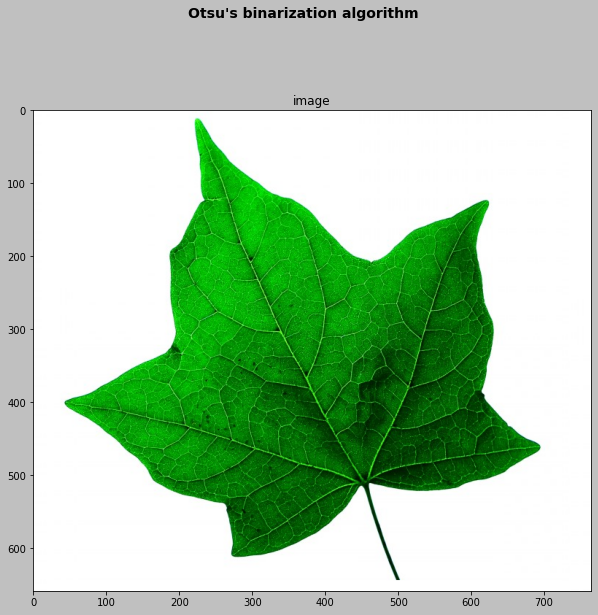

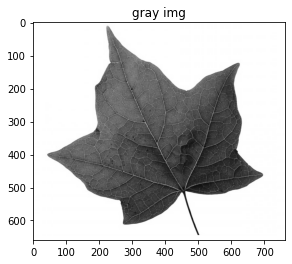

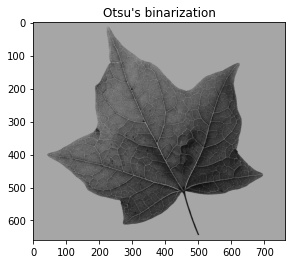

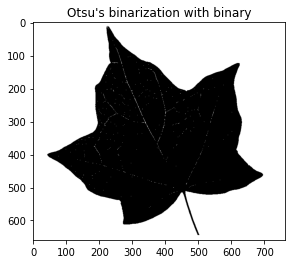

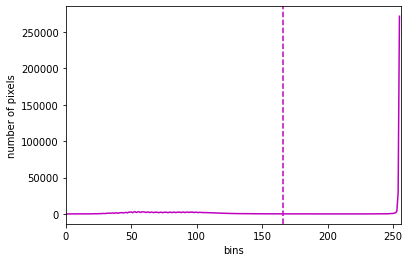

In [ ]:
def show_hist_with_matplotlib_gray_modified(hist, title, color, t=-1):
    """Shows the histogram using matplotlib capabilities"""

    # ax = plt.subplot(2, 2, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.axvline(x=t, color='m', linestyle='--')
    plt.plot(hist, color=color)

# Load the image and convert it to grayscale:
image_path = '../Dongkeun-OpenCV-ImgData/leaf.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 10))
plt.suptitle("Otsu's binarization algorithm", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Calculate histogram (only for visualization):
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Threshold the image aplying Otsu's algorithm:
ret1, th1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(gray_image,(5,5),0)
ret3, th3 = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plot all the images:
show_with_matplotlib_jh(image, "image")
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray img")
show_with_matplotlib_jh(cv2.cvtColor(th1, cv2.COLOR_GRAY2BGR), "Otsu's binarization")
show_with_matplotlib_jh(cv2.cvtColor(th3, cv2.COLOR_GRAY2BGR), "Otsu's binarization with binary")
show_hist_with_matplotlib_gray_modified(hist, "grayscale histogram", 'm', ret1)


# thresholding _otsu_filter_noise.py

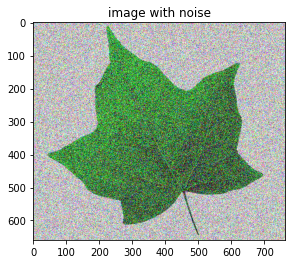

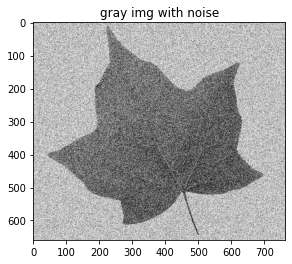

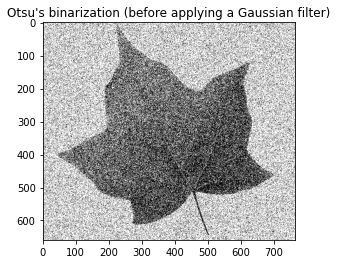

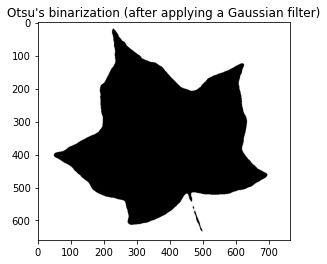

In [ ]:
# Load the image and convert it to grayscale:
image_path = '../Dongkeun-OpenCV-ImgData/leaf-noise.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Otsu's binarization algorithm:
ret1, th1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#  Blurs the image using a Gaussian filter to eliminate noise
gray_image_blurred = cv2.GaussianBlur(gray_image, (25, 25), 0)

# Otsu's binarization algorithm:
ret2, th2 = cv2.threshold(gray_image_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot all the images:
show_with_matplotlib_jh(image, "image with noise")
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray img with noise")
show_with_matplotlib_jh(cv2.cvtColor(th1, cv2.COLOR_GRAY2BGR),
                         "Otsu's binarization (before applying a Gaussian filter)")
show_with_matplotlib_jh(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR),
                         "Otsu's binarization (after applying a Gaussian filter)")



In [ ]:
from skimage.filters import (threshold_otsu, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte